In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from math import pi
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("./../../data/cleaned_data.csv", skipinitialspace=True, sep=',')
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174207 entries, 0 to 174206
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date                       174207 non-null  object 
 1   state                      174207 non-null  object 
 2   city_or_county             174207 non-null  object 
 3   address                    161854 non-null  object 
 4   latitude                   174207 non-null  float64
 5   longitude                  174207 non-null  float64
 6   congressional_district     171311 non-null  float64
 7   state_house_district       152161 non-null  float64
 8   state_senate_district      157207 non-null  float64
 9   participant_age1           140191 non-null  float64
 10  participant_age_group1     166276 non-null  object 
 11  participant_gender1        169655 non-null  object 
 12  min_age_participants       140204 non-null  float64
 13  avg_age_participants       14

In [3]:
# Drop rows with n_participants = 0
df.loc[df['n_participants'] == 0] = np.nan
df = df.dropna(subset=['n_participants'])

In [4]:
df['killed_ratio'] = df['n_killed']/df['n_participants'] 
df['injured_ratio'] = df['n_injured']/df['n_participants'] 
df['child_ratio'] = df['n_participants_child']/df['n_participants'] 
df['teen_ratio'] = df['n_participants_teen']/df['n_participants'] 
df['adult_ratio'] = df['n_participants_adult']/df['n_participants'] 
df['arrested_ratio'] = df['n_arrested']/df['n_participants'] 
df['unharmed_ratio'] = df['n_unharmed']/df['n_participants'] 
df['males_ratio'] = df['n_males']/df['n_participants'] 
df['females_ratio'] = df['n_females']/df['n_participants'] 

In [5]:
cols = ['latitude', 'longitude', 'congressional_district', 'state_house_district', 'state_senate_district', 'participant_age1', 'min_age_participants', 'avg_age_participants',
        'max_age_participants', 'n_participants_child', 'n_participants_teen', 'n_participants_adult', 'n_males', 'n_females', 'n_killed', 'n_injured', 'n_arrested',
        'n_unharmed', 'n_participants', 'povertyPercentage', 'candidatevotes', 'totalvotes', 'killed_ratio', 'injured_ratio', 'child_ratio', 'teen_ratio', 'adult_ratio', 
        'arrested_ratio', 'unharmed_ratio', 'males_ratio', 'females_ratio']
df = df[cols]
df = df.dropna()

In [6]:
corr_threshold = 0.9
print("Attributo A\t\tAttributo B\t\tCorr(A,B)")
for i in range(0, len(df.columns)):
    for j in range(i+1, len(df.columns)):
        corr = df[df.columns[i]].corr(df[df.columns[j]])
        if  corr > corr_threshold:
            print(df.columns[i] + "\t" + df.columns[j] + "\t" + '{:.3f}'.format(corr))

Attributo A		Attributo B		Corr(A,B)
participant_age1	avg_age_participants	0.942
participant_age1	max_age_participants	0.921
min_age_participants	avg_age_participants	0.949
avg_age_participants	max_age_participants	0.947


In [7]:
cols = ['participant_age1', 'min_age_participants', 'avg_age_participants', 'max_age_participants', 'candidatevotes', 'totalvotes']
df.drop(cols, axis=1, inplace=True)

In [8]:
minmax_scaler = MinMaxScaler()
norm_df = minmax_scaler.fit_transform(df.values)

## K-MEANS

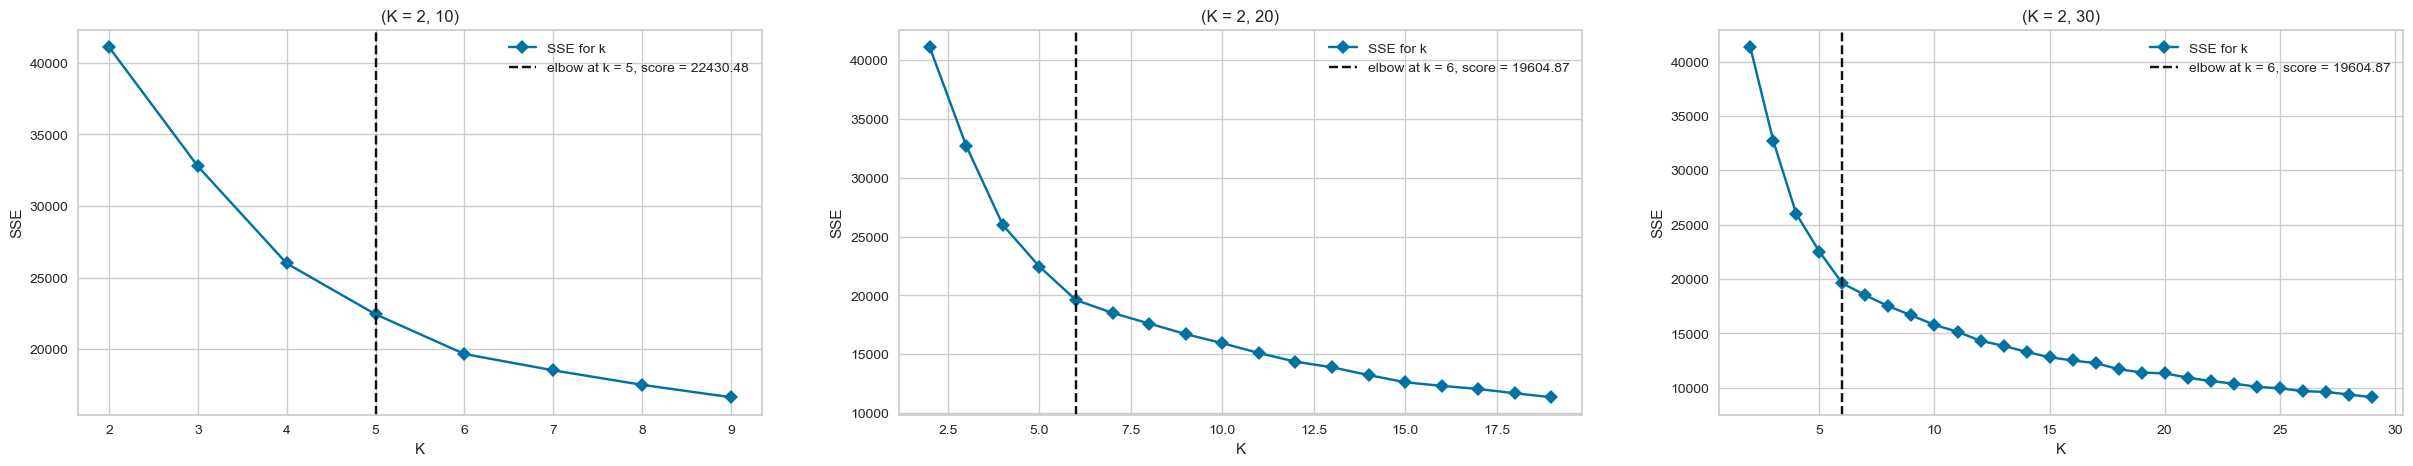

In [9]:
from yellowbrick.cluster import KElbowVisualizer

k_start = [2]
k_max = [10,20,30]
Ks = []
model = KMeans()

f, axs = plt.subplots(nrows=1, ncols=len(k_max), figsize=(30,5))

for i in range(len(k_max)):
    vis = KElbowVisualizer(model, k=(k_start[0],k_max[i]), metric='distortion', timings=False, ax=axs[i])
    vis.fit(norm_df)  
    axs[i].set_title('(K = ' + str(k_start[0]) + ', ' + str(k_max[i]) + ')' )
    axs[i].set_ylabel('SSE')
    axs[i].set_xlabel('K')
    axs[i].legend(['SSE for k','elbow at k = ' + str(vis.elbow_value_) + ', score = ' + '{:.2f}'.format(vis.elbow_score_)])
    if (vis.elbow_value_ not in Ks) and (vis.elbow_value_ != None):
        Ks.append(vis.elbow_value_)
plt.show()

Visualization of clusters centers by means of parallel coordinates

In [10]:
model = KMeans(n_clusters=5, n_init=10, max_iter=100)
model.fit(norm_df)
centroidi = model.cluster_centers_
for i, centroide in enumerate(centroidi):
    print(f"Centroide {i+1}: {centroide}\n")

Centroide 1: [5.79262636e-01 7.29363666e-01 1.83439108e-01 6.39071061e-02
 2.03233138e-01 4.39393939e-03 5.63973064e-04 4.10404830e-02
 4.28015734e-02 1.34469697e-02 7.23729947e-02 4.19786096e-03
 8.87096774e-04 7.32954545e-04 1.04378342e-02 5.15008117e-01
 9.53254554e-01 2.94912969e-02 1.44044913e-02 5.05681818e-03
 9.80538690e-01 7.84113456e-03 4.39691558e-03 8.70294237e-01
 1.29705763e-01]

Centroide 2: [0.60794994 0.75426951 0.15848709 0.07004604 0.22117807 0.00127051
 0.0020518  0.05384192 0.06104509 0.01104393 0.01507215 0.01218451
 0.04296129 0.00114674 0.02311656 0.46671272 0.11143297 0.09887382
 0.00341157 0.0198226  0.97676583 0.80706904 0.00659697 0.90589402
 0.09410598]

Centroide 3: [0.6614776  0.77897974 0.13656868 0.05572442 0.18141658 0.00531283
 0.00125008 0.04355253 0.04823739 0.01139655 0.00449477 0.07660957
 0.00130956 0.00189856 0.01350912 0.44986862 0.02925558 0.94615741
 0.02500052 0.01277721 0.96222227 0.01252074 0.01111822 0.87858945
 0.12141055]

Centroide 4: 

In [11]:
from scipy.spatial import distance
mean_distance = distance.cdist(centroidi, centroidi, 'euclidean').mean()

print(f"Distanza media tra i centroidi: {mean_distance}")

Distanza media tra i centroidi: 1.023313468330994


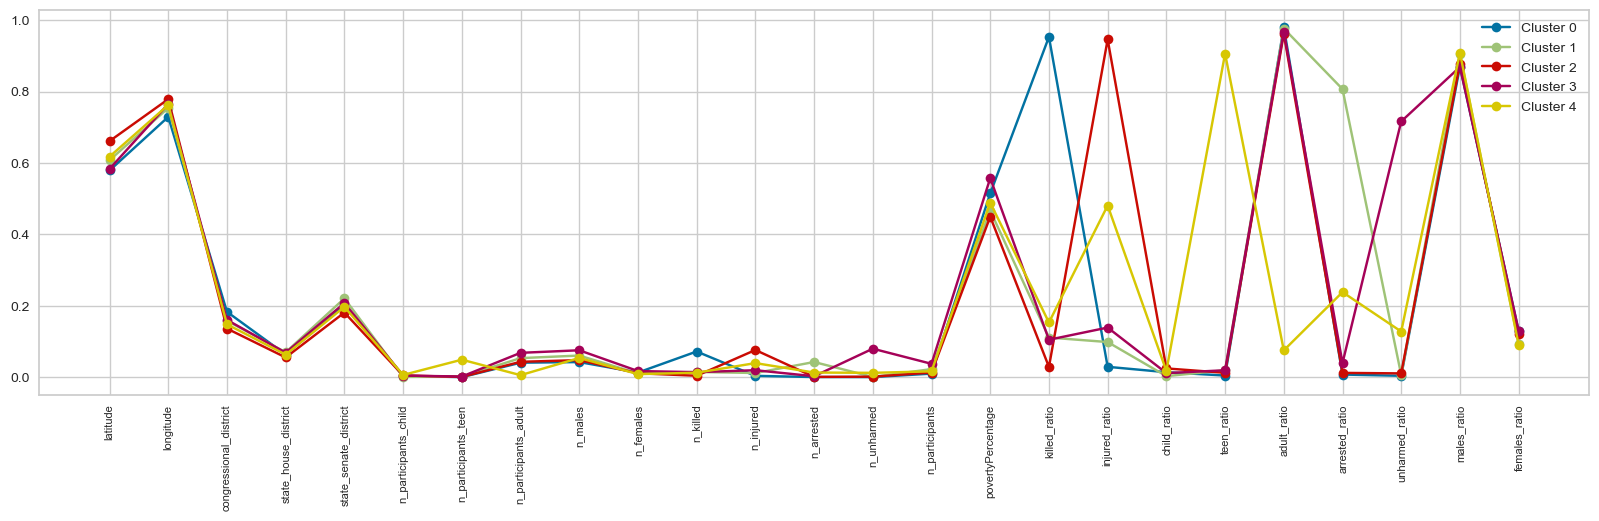

In [12]:
plt.figure(figsize=(20, 5))
for i in range(0, len(centroidi)):
    plt.plot(centroidi[i], marker='o', label='Cluster %s' % (i))
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(range(0, len(df.columns)), df.columns, fontsize=8, rotation='vertical')
plt.legend(fontsize=10)
plt.show()

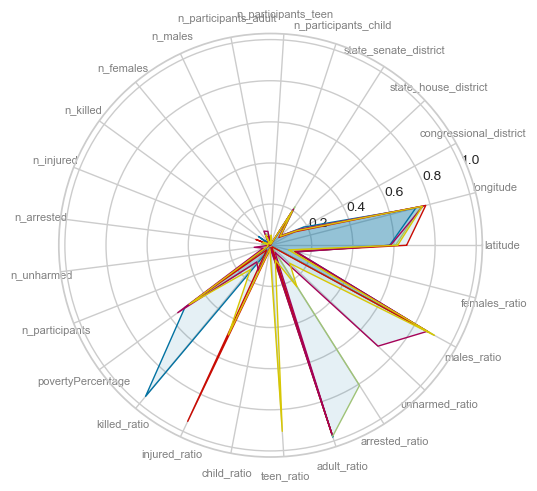

In [13]:

N = len(df.columns)
for i in range(0, len(centroidi)):
    angles = [n / float(N) * 2 * pi for n in range(N)]
    values = centroidi[i].tolist()
    values += values[:1]
    angles += angles[:1]
    ax = plt.subplot(polar=True)
    plt.xticks(angles[:-1], df.columns, color='grey', size=8) 

    ax.plot(angles, values, linewidth=1, linestyle='solid')
    ax.fill(angles, values, 'b', alpha=0.1)

In [14]:
model.labels_

array([2, 1, 0, ..., 2, 2, 1])

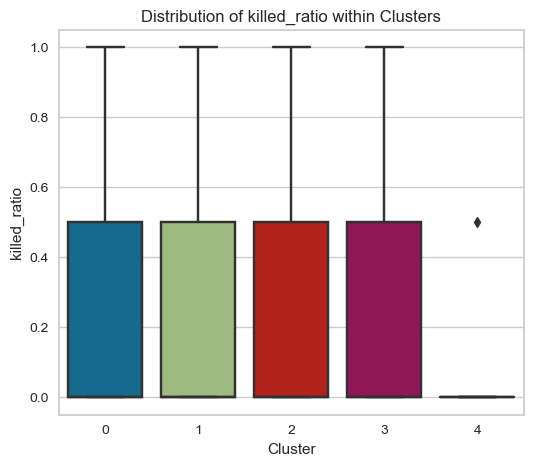

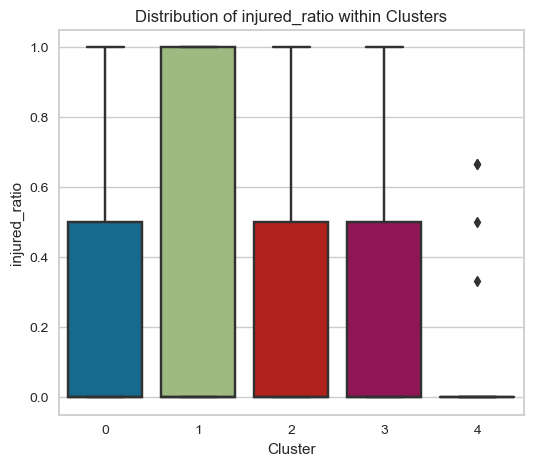

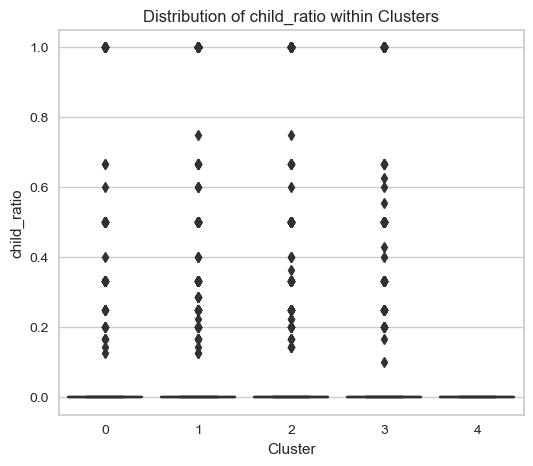

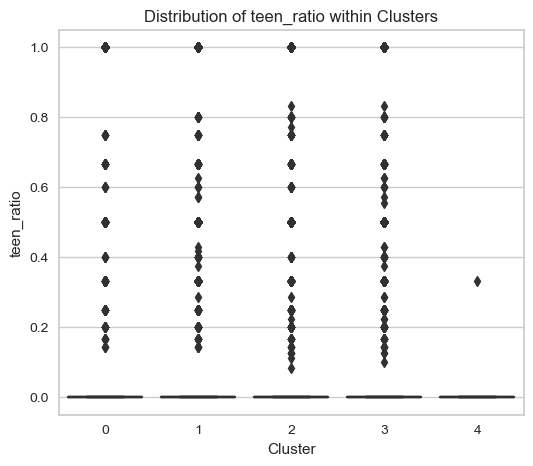

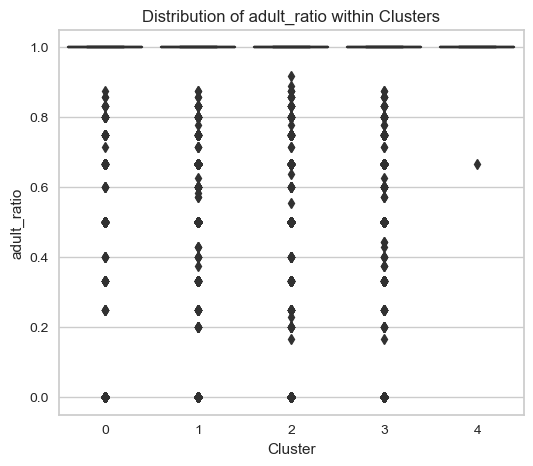

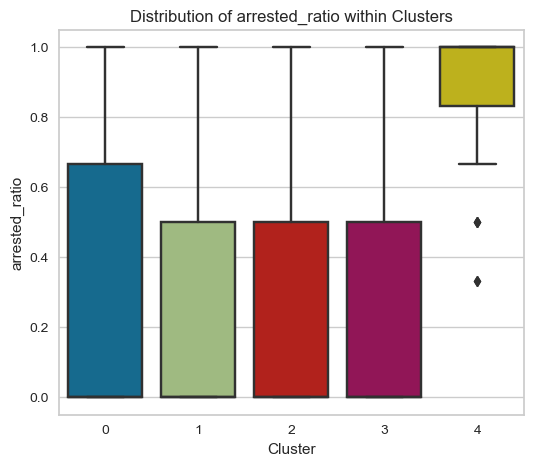

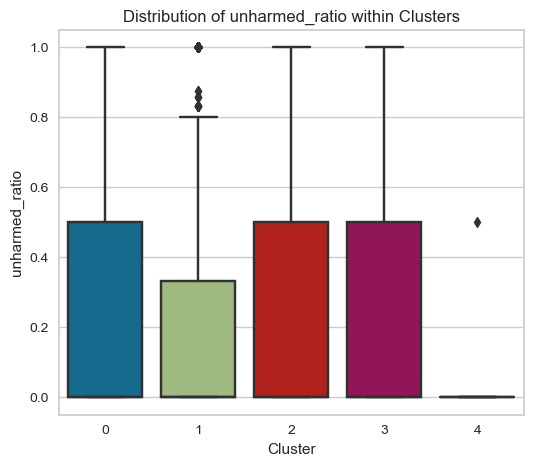

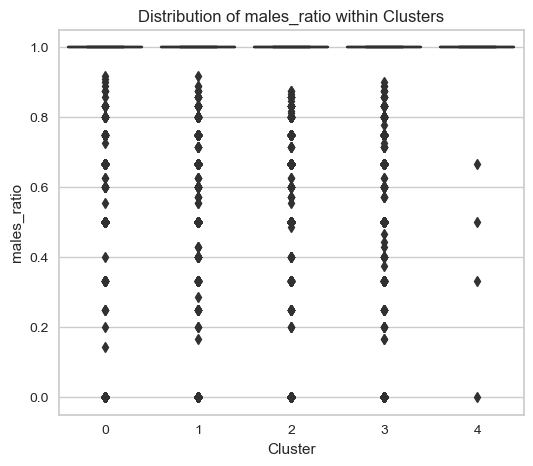

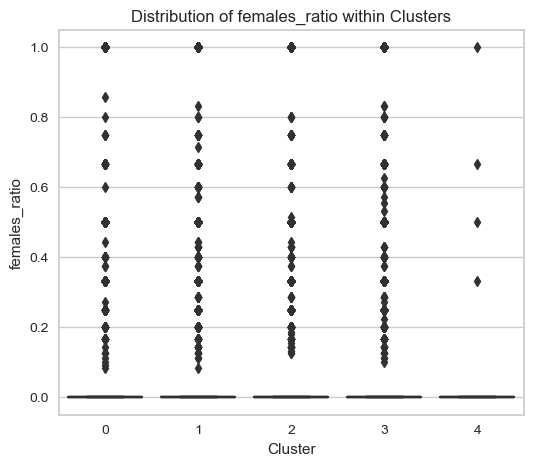

In [15]:
data = pd.DataFrame(df, columns=['killed_ratio', 'injured_ratio', 'child_ratio', 'teen_ratio', 'adult_ratio', 'arrested_ratio', 'unharmed_ratio', 'males_ratio', 'females_ratio'])
data['Cluster'] = model.fit_predict(df)

# Analyze the distribution of variables within clusters using boxplots
for variable in data.columns[:-1]: 
    plt.figure(figsize=(6, 5))
    sns.boxplot(x='Cluster', y=variable, data=data)
    plt.title(f'Distribution of {variable} within Clusters')
    plt.show()